# Exponential Distribution

---

## Import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats

%matplotlib inline
plt.style.use("fivethirtyeight")

---

## Utilities

In [2]:
def get_bins(xmin, xmax, step = 1):
    bins = np.arange(xmin, xmax, step)
    bins = bins if len(bins) > 2 else get_bins(xmin, xmax + 1, step)
    return bins if len(bins) <= 100 \
        else get_bins(xmin, xmax, step = step + 1)

In [3]:
def get_continuous_ticks(xmin, xmax):
    cuts = [5, 10, 20, 50, 100, 200, 500, 1000]
    ticks = np.arange(int(np.floor(xmin)), int(np.ceil(xmax)) + 1)
    if len(ticks) > 15:
        for cut in cuts:
            ticks = [tick for tick in ticks if tick % cut == 0]
            if len(ticks) <= 15:
                return ticks
        return ticks
    return ticks

In [4]:
def plot_continuous_distribution(f, x_axis, obs = None, q = None, **kwargs):
    pdf = f.pdf(x_axis, **kwargs)
    
    fig, ax = plt.subplots(figsize = (8, 4))
    ax.plot(x_axis, pdf, alpha = 0.7, color = "k")
    ax.fill_between(x_axis, pdf, alpha = 0.4)
    
    print(f"Mean: {f.mean(**kwargs)}")
    print(f"Median: {f.median(**kwargs)}")
    print(f"Variance: {f.var(**kwargs)}")
    print(f"Standard Deviation: {f.std(**kwargs)}")
    
    plt.xticks(get_continuous_ticks(xmin = x_axis.min(), xmax = x_axis.max()))
    plt.show()

In [5]:
def sample_continuous_distribution(f, size = 1, seed = None, **kwargs):
    sample = f.rvs(size = size, random_state = seed, **kwargs)
    
    print(f"Min: {np.min(sample)}")
    print(f"Mean: {np.mean(sample)}")
    print(f"Median: {np.median(sample)}")
    print(f"Max: {np.max(sample)}")
    print(f"Variance: {np.var(sample, ddof = 0)}")
    print(f"Standard Deviation: {np.std(sample, ddof = 0)}")
    
    fig, ax = plt.subplots(figsize = (8, 4))
   
    plt.hist(x = sample,
             density = True,
             edgecolor = "k",
             bins = get_bins(sample.min(), sample.max() + 1),
             linewidth = 2)

    plt.xticks(get_continuous_ticks(sample.min(), sample.max()))
    plt.show()
    return sample

---

La distribuzione esponenziale è particolarmente utile per modellare i tempi di attesa relativi al verificarsi di un certo evento. Specifichiamo che, affinché scenari del genere possano essere modellati con l'esponenziale, i contesti operativi futuri devono indipendenti dal passato, cioè non deve verificarsi alcun processo di *ageing*.

Ha solo un parametro, il **rate** $\lambda$.

**PDF**:

$$\large f(x)=\lambda e^{-\lambda x}\;\;\;\;\;x\geq 0$$

L'aspettazione e la varianza di una variabile esponenziale sono:

$$\large E(X)=\frac{1}{\lambda}$$

$$\large Var(X)=\frac{1}{\lambda^2}$$

Un'interessate proprietà dell'esponenziale è il fatto di essere **memoryless**: se un certo tempo $t$ è stato già raggiunto, la probabilità che si arrivi ad un tempo pari a $t+\Delta$ non dipende da $t$.

Esiste anche un importante teorema che lega la distribuzione esponenziale alla distribuzione di Poisson: il numero di eventi $Y$ che si verificano in un certo intervallo di tempo segue l'andamento di una distribuzione di Poisson con *rate* $\lambda$ se e soltanto se il tempo di attesa fra il verificarsi di due eventi segue un andamento esponenziale parametrizzato dallo stesso *rate* $\lambda$.

---

#### Probability Density Function

Mean: 1.0
Median: 0.6931471805599453
Variance: 1.0
Standard Deviation: 1.0


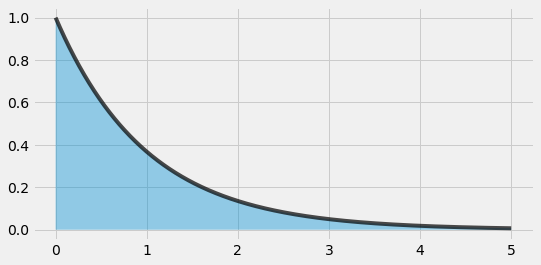

In [6]:
rate = 1
loc = 0
max_time = 5

x_axis = np.linspace(0, max_time, 1000)

plot_continuous_distribution(f = stats.expon,
                             x_axis = x_axis,
                             loc = loc,
                             scale = 1 / rate)

---

#### RVS

Min: 3.945818492645143e-05
Mean: 1.9659024555681568
Median: 1.3559733364052313
Max: 20.748021337010787
Variance: 4.363073447154502
Standard Deviation: 2.088797129247956


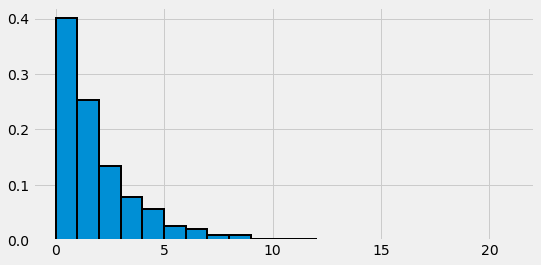

In [7]:
rate = 0.5
loc = 0
max_time = 5

sample = sample_continuous_distribution(f = stats.expon,
                                        size = 1000,
                                        loc = loc,
                                        scale = 1 / rate)

---